In [1]:
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt
import scipy.optimize as so
import jax
import jax.numpy as jnp
# from jax.config import config
jax.config.update("jax_enable_x64", True)

<h1>Forward Problem</h1>

l2 error xvec: 9.41008164741723e-15


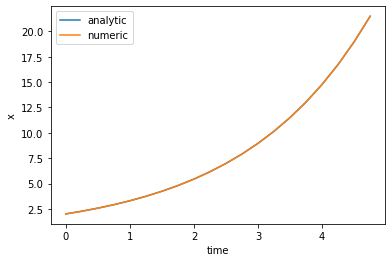

In [2]:
L = 5.0

dt = 0.25

tvec = np.arange(0, 5, dt)

a = 0.5

x0 = 2.0

xvec = [x0]
for i in range(len(tvec) - 1):
    xvec.append(xvec[-1] * np.exp(a * dt))

xvec = np.array(xvec)

print('l2 error xvec:', nl.norm(x0 * np.exp(a * tvec) - xvec))

plt.plot(tvec, x0 * np.exp(a * tvec), label = 'analytic')
plt.plot(tvec, xvec, label = 'numeric')
plt.xlabel('time')
plt.ylabel('x')
plt.legend()
plt.show()

---
<h1>Inverse Problem</h1>

In [3]:
print(xvec)
print(xvec[:2])

print(np.exp(a * dt))
print(np.exp(2 * a * dt))
print(np.exp(np.arange(1, 2 + 1) * a * dt))

[ 2.          2.26629691  2.56805083  2.90998283  3.29744254  3.73649191
  4.23400003  4.79775059  5.43656366  6.1604337   6.98068591  7.91015345
  8.96337814 10.15683807 11.50920535 13.04163824 14.7781122  16.74579498
 18.97547167 21.50202637]
[2.         2.26629691]
1.1331484530668263
1.2840254166877414
[1.13314845 1.28402542]


In [4]:
gradxvec1 = [0.0]
for i in range(1, len(tvec)):
    gradxvec1.append(dt * (np.exp(np.arange(1, i + 1) * a * dt) @ xvec[:i]))

# print(gradxvec1)

gradxvec2 = [0.0]
for i in range(1, len(tvec)):
    gradxvec2.append(np.exp(a * dt) * (dt * xvec[i - 1] + gradxvec2[i - 1]))

# print(gradxvec2)

print(np.abs(np.subtract(gradxvec1, gradxvec2)))

[0.00000000e+00 0.00000000e+00 1.00445172e-02 4.57057906e-02
 1.30188018e-01 2.97124090e-01 5.94277296e-01 1.08842334e+00
 1.87176911e+00 3.07036935e+00 4.85513697e+00 7.45621688e+00
 1.11817165e+01 1.64420747e+01 2.37817216e+01 3.39201585e+01
 4.78052023e+01 6.66819271e+01 9.21818530e+01 1.26438237e+02]


In [5]:
print(np.array([11, 12, 13, 14, 15, 16])[0:2])

print(np.arange(1, 2))

[11 12]
[1]


In [44]:
def directmethod(theta):
    # propagate with theta and compute gradient of J
    xhat = x0
    gradxhat = 0.0
    gradJ = 0.0
    for i in range(len(tvec) - 1):
        # \grad \hat{x}_{i+1} = \exp(\theta * \Delta t) * (\Delta t * \hat{x}_{i} + \exp(\theta * \grad \hat{x}_{i})
        gradxhat = np.exp(theta * dt) * (dt * xhat + gradxhat)

        # \hat{x}_{i+1} = \hat{x}_{i} * \exp(\theta * \Delta t)
        xhat = xhat * np.exp(theta * dt)

        # \grad J_{i+1} = -(x_{i+1}- \hat{x}_{i+1}) * \grad \hat{x}_{i+1}
        gradJ += -(xvec[i + 1] - xhat) * gradxhat

    return gradJ


# def directmethod(theta):
#     # propagate with theta and compute gradient of J
#     xhatvec = [x0]
#     gradxhatvec2 = [0.0]
#     gradJ1 = 0.0
#     for i in range(len(tvec) - 1):
#         # \hat{x}_{i+1} = \hat{x}_{i} * \exp(\theta * \Delta t)
#         xhatvec.append(xhatvec[i] * np.exp(theta * dt))
#
#         # \grad \hat{x}_{i+1} = \exp(\theta * \Delta t) * (\Delta t * \hat{x}_{i} + \exp(\theta * \grad \hat{x}_{i})
#         gradxhatvec2.append(np.exp(theta * dt) * (dt * xhatvec[i] + gradxhatvec2[i]))
#
#         # \grad J_{i+1} = -(x_{i+1}- \hat{x}_{i+1}) * \grad \hat{x}_{i+1}
#         gradJ1 += -(xvec[i + 1] - xhatvec[i + 1]) * gradxhatvec2[i + 1]
#         # print(np.abs(gradxhatvec2[-1] - thisgradxhat))
#
#     gradJ2 = -(np.subtract(xvec, xhatvec)) @ gradxhatvec2
#
#     return (gradJ1, gradJ2)


# def directmethod(theta):
#     # propagate with theta
#     xhatvec = [x0]
#     for i in range(len(tvec) - 1):
#         xhatvec.append(xhatvec[-1] * np.exp(theta * dt))
#
#     xhatvec = np.array(xhatvec)
#
#     # print(xvec)
#     # print(xhatvec)
#     # print(xvec - xhatvec)
#
#     # compute gradient of J
#     gradxhatvec1 = [0.0]
#     gradxhatvec2 = [0.0]
#     for i in range(1, len(tvec)):
#         gradxhatvec1.append(dt * (np.exp(np.arange(1, i + 1) * theta * dt) @ np.flip(xhatvec[:i])))
#         # print(np.exp(np.arange(1, i + 1) * theta * dt))
#         # print(xhatvec[:i])
#         gradxhatvec2.append(np.exp(theta * dt) * (dt * xhatvec[i - 1] + gradxhatvec2[i - 1]))
#         # print(np.abs(gradxhatvec1[-1] - gradxhatvec2[-1]))
#
#     gradJ1 = -(xvec - xhatvec) @ gradxhatvec1
#     gradJ2 = -(xvec - xhatvec) @ gradxhatvec2
#
#     return (gradJ1, gradJ2)

In [45]:
print(directmethod(a + 0.05))

2297.108361013416


In [46]:
def obj(theta):
    # propagate with theta
    xhatvec = [x0]
    for i in range(len(tvec) - 1):
        xhatvec.append(jnp.exp(theta * dt) * xhatvec[-1])

    xhatvec = jnp.array(xhatvec)

    return 0.5 * jnp.sum((xvec - xhatvec)**2)



In [47]:
print(obj(a))

0.0


In [48]:
gradobj = jax.grad(obj)
print(gradobj(a))

-0.0


In [50]:
# check direct grads against JAX grads

for _ in range(50):
    thetahat = np.random.default_rng().uniform(-0.5, 0.5)
    # print(directmethod(thetahat), gradobj(thetahat))
    print('grad error:', np.abs(np.subtract(directmethod(thetahat), gradobj(thetahat))))
    # print('obj:', obj(thetahat))

grad error: 5.684341886080802e-14
grad error: 1.1368683772161603e-13
grad error: 2.2737367544323206e-13
grad error: 3.410605131648481e-13
grad error: 2.2737367544323206e-13
grad error: 2.2737367544323206e-13
grad error: 2.2737367544323206e-13
grad error: 0.0
grad error: 4.547473508864641e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 5.684341886080802e-14
grad error: 4.547473508864641e-13
grad error: 1.1368683772161603e-13
grad error: 2.842170943040401e-14
grad error: 2.2737367544323206e-13
grad error: 2.2737367544323206e-13
grad error: 1.1368683772161603e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 1.1368683772161603e-13
grad error: 1.1368683772161603e-13
grad error: 2.842170943040401e-14
grad error: 2.2737367544323206e-13
grad error: 5.684341886080802e-14
grad error: 1.1368683772161603e-13
grad error: 2.2737367544323206e-13
grad error: 4.547473508864641e-13
grad error: 2.2737367544323206e-13
grad error: 3.410605131648481e-13
grad error: 5.684

In [52]:
# grad decent using direct method grad

# grad decent step size
ss = 0.00001

thetahat = np.random.default_rng(123).uniform()
# thetahat = a + np.random.default_rng(123).uniform(-0.05, 0.05)

print('a:', a)
print('thetahat initial:', thetahat)

for i in range(50):
    thetahat -= ss * directmethod(thetahat)

    print('thetahat:', thetahat)


a: 0.5
thetahat initial: 0.6823518632481435
thetahat: 0.48126917685700815
thetahat: 0.4868172307300783
thetahat: 0.49086115762751714
thetahat: 0.49373720285539446
thetahat: 0.4957443663334799
thetahat: 0.4971257164108151
thetahat: 0.49806689906703255
thetahat: 0.49870368330995596
thetahat: 0.49913243326175605
thetahat: 0.4994201584437499
thetahat: 0.4996128122713378
thetahat: 0.49974161383224425
thetahat: 0.49982763869518954
thetahat: 0.4998850545368694
thetahat: 0.49992335836137164
thetahat: 0.4999489042328244
thetahat: 0.4999659380239632
thetahat: 0.4999772944901016
thetahat: 0.4999848651885996
thetahat: 0.4999899118316069
thetahat: 0.4999932757992688
thetahat: 0.4999955180771686
thetahat: 0.4999970126577171
thetahat: 0.49999800885203194
thetahat: 0.4999986728478672
thetahat: 0.4999991154203023
thetahat: 0.4999994104065978
thetahat: 0.49999960702234636
thetahat: 0.49999973807145875
thetahat: 0.4999998254187443
thetahat: 0.49999988363770426
thetahat: 0.4999999224419524
thetahat: 0.499

In [70]:
def adjmethod(theta):
    # propagate with theta
    xhatvec = [x0]
    for i in range(len(tvec) - 1):
        xhatvec.append(xhatvec[-1] * jnp.exp(theta * dt))

    xhatvec = jnp.array(xhatvec)

    # solve for lambda
    # build lambdavec backwards then flip at end
    # \lambda_T = -(x_T - \hat{x}_T)
    lamvec = [-(xvec[-1] - xhatvec[-1])]
    for i in range(2, len(tvec)):
        # \lambda_k = -(x_k \hat{x}_k) + \lambda_{k+1} \exp(\theta \Delta t)
        lamvec.append(-(xvec[-i] - xhatvec[-i]) + lamvec[i - 2] * jnp.exp(theta * dt))

    lamvec = jnp.flip(jnp.array(lamvec))
    # print(tvec.shape)
    # print(lamvec.shape)
    # print(xhatvec.shape)

    # \grad L = \Delta t * \exp(\theta \Delta t) * \sum_{k=0}^{T-1} \lambda_{k+1} * \hat{x}_k
    return dt * jnp.exp(theta * dt) * (lamvec @ xhatvec[:-1])

In [71]:
print(adjmethod(a))

0.0


In [73]:
# check adjoint grads against JAX grads

for _ in range(50):
    # thetahat = a + np.random.default_rng().uniform(-0.005, 0.005)
    thetahat = np.random.default_rng().uniform(-0.5, 0.5)
    # print(adjmethod(thetahat), gradobj(thetahat))
    print('grad error:', np.abs(adjmethod(thetahat) - gradobj(thetahat)))

grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 2.2737367544323206e-13
grad error: 0.0
grad error: 2.842170943040401e-14
grad error: 4.547473508864641e-13
grad error: 5.684341886080802e-14
grad error: 6.821210263296962e-13
grad error: 0.0
grad error: 5.684341886080802e-14
grad error: 2.2737367544323206e-13
grad error: 1.1368683772161603e-13
grad error: 2.2737367544323206e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 1.1368683772161603e-13
grad error: 5.684341886080802e-14
grad error: 4.547473508864641e-13
grad error: 5.684341886080802e-14
grad error: 1.1368683772161603e-13
grad error: 5.684341886080802e-14
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad error: 2.2737367544323206e-13
grad error: 5.684341886080802e-14
grad error: 5.684341886080802e-14
grad error: 1.1368683772161603e-13
grad error: 0.0
grad error: 2.2737367544323206e-13
grad err